In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
# read flash.dat to a list of lists

In [2]:
def ijk(i, j, k, Nx, Ny, Nz):
    """
    A map from 1D flattened date to 3D simulatio results
    """
    return [(((i) * (Ny + 1)) + (j)) * (Nz + 1) + (k)]

def gene_data(f, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz):
    data_gen = np.zeros((Nx+1)*(Ny+1)*(Nz+1))
    for i in range(Nx+1):
        for j in range(Ny+1):
            for k in range(Nz+1):
                data_gen[ijk(i, j, k, Nx, Ny, Nz)] = f(xl+i*dx, yl+j*dy, zl+k*dz)
    return data_gen

In [3]:
def get_normsimp(dd, xl, Nx, dx, yl, Ny, dy, zl, Nz, dz):
    """
    Function obtaining norm of the input data by Simpson's 1/3 rule
    """
    normz = np.zeros((Nx+1, Ny+1))
    normy = np.zeros((Nx+1))
    norm = 0
    for i in range(Nx+1):
        for j in range(Ny+1):
            normz[i,j] = dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+0] \
            + 2*sum(dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1):(((i) * (Ny + 1)) + (j)) * (Nz + 1)+Nz-2:2]) \
            + 4*sum(dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+1:(((i) * (Ny + 1)) + (j)) * (Nz + 1)+Nz-1:2]) \
            + dd[(((i) * (Ny + 1)) + (j)) * (Nz + 1)+ Nz-1]

    for i in range(Nx+1):
        normy[i] = normz[i, 0] \
        + 2*sum(normz[i, :Ny-2:2]) \
        + 4*sum(normz[i, 1:Ny-1:2]) \
        + normz[i, Ny-1]

    norm = normy[0] \
    + 2*sum(normy[:Nx-2:2]) \
    + 4*sum(normy[1:Nx-1:2]) \
    + normy[Nx-1]

    return norm*dx*dy*dz/27

## Test ground state wave function

3.5887531466733815 0.17553743576132633 0.012566370614359173 1.5874010519681994 0.5083258231690274


Text(0.5, 1.0, 'TF on Z axis')

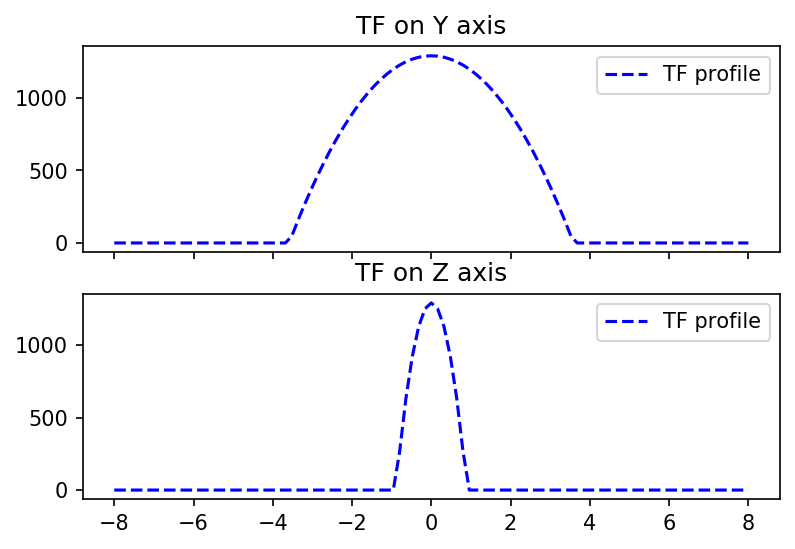

In [4]:
# parameters for this simulation
N = 100000 # number of particles
pi = 4 * np.arctan(1) 
omgx = 1.0 # trap frequency along x and y direction
z2x = 4 # Ration between the trap frequency of z and x
omgz = omgx*z2x # trap frequency along z direction
omg = (omgx*omgx*omgz)**(1/3) 
aho = 1/np.sqrt(omg)
a = 0.001 # self interaction: s-wave scattering length
g = 4*pi*a

R = (15*N*a/aho)**(1/5)*aho       # radius of condensate
Rc = (15*N*a/aho)**(1/5)*aho       # radius of condensate
rh = R*(aho/R)**2                    # healing length
# omgc = 5/(2*R**2)*np.log(R/rh)
omgc = 5/(2*R**2)*np.log(0.671*R/rh) # Critical angular velocity to generate vortices
mu = omg/2*(15*N*a/aho)**(2/5)
print(R, rh, g, omg, omgc)
def fermiFunc(x, y, z):
    n = (mu-1/2*omg**2*(x**2+y**2+(z2x*z)**2))/g
    n_mask = n<0
    n[n_mask] = 0
    return n

xd= np.linspace(-8, 8, 100+1)
yd= np.linspace(-8, 8, 100+1)
zd= np.linspace(-8, 8, 100+1)


fig, (ax1, ax2) = plt.subplots(2, 1, dpi=150, sharex=True, sharey=True)


ax1.plot(yd, fermiFunc(0,yd,0), 'b--', label="TF profile")
ax1.legend()
# # ax2 = fig.add_subplot(212)
# # ax2.plot(z, dfVz.phi, 'b*', label="trap simulation")
ax1.set_title(r'TF on Y axis')

ax2.plot(zd, fermiFunc(0,0,zd), 'b--', label="TF profile")
ax2.legend()
# ax2 = fig.add_subplot(212)
# ax2.plot(z, dfVz.phi, 'b*', label="trap simulation")
ax2.set_title(r'TF on Z axis')

In [5]:
file_prefix = "./"
dfd = pd.read_csv(file_prefix+"densX0000650_0.0.dat", sep=" ",  names=["X","Y","Z","dens"])
datad = np.array([dfd.X.values, dfd.Y.values, dfd.Z.values, dfd.dens.values])
Nxd = 100
Nyd = 100
Nzd = 20
xrd = max(datad[0])
xld = min(datad[0])
yrd = max(datad[1])
yld = min(datad[1])
zrd = max(datad[2])
zld = min(datad[2])
dxd = (xrd-xld)/Nxd
dyd = (yrd-yld)/Nyd
dzd = (zrd-zld)/Nzd
print((Nxd+1)*(Nyd+1)*(Nzd+1))
print([xld,dxd,Nxd,yld,dyd,Nyd,zld,dzd,Nzd])
dfd

214221
[-8.0, 0.16, 100, -8.0, 0.16, 100, -2.0, 0.2, 20]


,X,Y,Z,dens
0,-8.0,-8.0,-2.0,0.0
1,-8.0,-8.0,-1.8,0.0
2,-8.0,-8.0,-1.6,0.0
3,-8.0,-8.0,-1.4,0.0
4,-8.0,-8.0,-1.2,0.0
...,...,...,...,...
214216,8.0,8.0,1.2,0.0
214217,8.0,8.0,1.4,0.0
214218,8.0,8.0,1.6,0.0
214219,8.0,8.0,1.8,0.0


(101, 4)
(21, 4)


Text(0.5, 1.0, 'Simulation on Z axis, $\\Omega=0.8$')

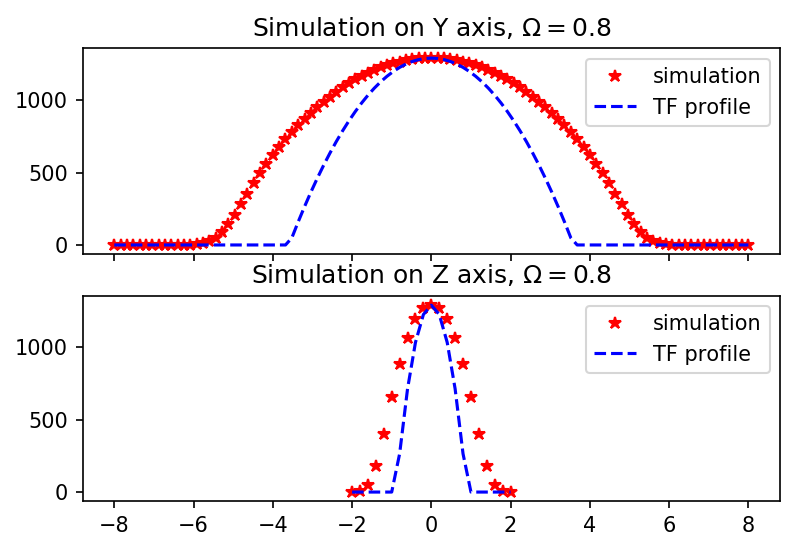

In [6]:
# Take the y axis where x and z are 0
dfzd = dfd[(dfd.X == 0)&(dfd.Z == 0)]
print(dfzd.shape)
xd= np.linspace(xld, xrd, Nxd+1)
yd= np.linspace(yld, yrd, Nyd+1)
zd= np.linspace(zld, zrd, Nzd+1)

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=150, sharex=True, sharey=True)

ax1.plot(yd, dfzd.dens, 'r*', label="simulation")
ax1.plot(yd, fermiFunc(0,yd,0), 'b--', label="TF profile")
ax1.legend()
# # ax2 = fig.add_subplot(212)
# # ax2.plot(z, dfVz.phi, 'b*', label="trap simulation")
ax1.set_title(r'Simulation on Y axis, $\Omega=0.8$')
dfzd = dfd[(dfd.X == 0)&(dfd.Y == 0)]
print(dfzd.shape)
ax2.plot(zd, dfzd.dens, 'r*', label="simulation")
ax2.plot(zd, fermiFunc(0,0,zd), 'b--', label="TF profile")
ax2.legend()
# ax2 = fig.add_subplot(212)
# ax2.plot(z, dfVz.phi, 'b*', label="trap simulation")
ax2.set_title(r'Simulation on Z axis, $\Omega=0.8$')

In [7]:
N-get_normsimp(dfd.dens, xld, Nxd, dxd, yld, Nyd, dyd, zld, Nzd, dzd)

129.7017557228828

The difference between N and simulation norm can reflect how far is this state away from true ground state. We can see when rotational angular velocity is 0.0, the difference is much smaller than that of 0.8, so we should choose smaller time step or higher simulation resolution when dealing with high rotating cases

In [8]:
omg

1.5874010519681994

In [9]:
# parameters for this simulation
N = 100000 # number of particles
pi = 4 * np.arctan(1) 
omgx = 1.587 # trap frequency along x and y direction
z2x = 1 # Ration between the trap frequency of z and x
omgz = omgx*z2x # trap frequency along z direction
omg = (omgx*omgx*omgz)**(1/3) 
aho = 1/np.sqrt(omg)
a = 0.001 # self interaction: s-wave scattering length
g = 4*pi*a

R = (15*N*a/aho)**(1/5)*aho       # radius of condensate
Rc = (15*N*a/aho)**(1/5)*aho       # radius of condensate
rh = R*(aho/R)**2                    # healing length
# omgc = 5/(2*R**2)*np.log(R/rh)
omgc = 5/(2*R**2)*np.log(0.671*R/rh) # Critical angular velocity to generate vortices
mu = omg/2*(15*N*a/aho)**(2/5)
print(R, rh, g, omg, omgc)

3.5891158857814762 0.17556405053500324 0.012566370614359173 1.587 0.5082132713888445
